In [1]:
import os
os.chdir('./..')

In [158]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
pwd

'/home/edoardo/Git_Projects/DMProject'

In [4]:
_BASE_PATH = 'dataset/originals'

In [6]:
events_train_df = pd.read_csv(f'{_BASE_PATH}/events_train.csv')
events_test_df = pd.read_csv(f'{_BASE_PATH}/events_test.csv')

speeds_train_df = pd.read_csv(f'{_BASE_PATH}/speeds_train.csv')
speeds_test_df = pd.read_csv(f'{_BASE_PATH}/speeds_test.csv')

weather_train_df = pd.read_csv(f'{_BASE_PATH}/weather_train.csv')
weather_test_df = pd.read_csv(f'{_BASE_PATH}/weather_test.csv')

#distances_df = pd.read_csv(f'{_BASE_PATH}/distances.csv')

sensors_df = pd.read_csv(f'{_BASE_PATH}/sensors.csv')

### EVENTS_DF

In [8]:
events_train_df.columns

Index(['START_DATETIME_UTC', 'END_DATETIME_UTC', 'EVENT_DETAIL', 'EVENT_TYPE',
       'KM_END', 'KM_START', 'KEY', 'KEY_2'],
      dtype='object')

In [10]:
events_train_df

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
0,2018-07-19 07:34:46,2018-08-01 15:23:17,0.0,Gestione_viabilita,959,954,523.0,523_959
1,2018-07-25 12:20:06,2018-10-12 18:29:37,1.0,Pavimentazione,1814,1821,325.0,325_1814
2,2018-08-01 07:44:00,2018-08-01 16:18:58,2.0,Manutenzione_opere_in_verde,321,282,525.0,525_321
3,2018-08-01 08:14:30,2018-08-01 17:39:13,3.0,Opera_arte,713,712,517.0,517_713
4,2018-08-01 08:18:32,2018-08-01 17:38:27,3.0,Opera_arte,2542,2543,518.0,518_2542
5,2018-08-01 10:27:22,2018-08-01 11:00:19,4.0,Ostacolo_in_carreggiata,273,273,525.0,525_273
6,2018-08-01 10:49:03,2018-08-01 11:32:35,4.0,Ostacolo_in_carreggiata,455,455,35.0,35_455
7,2018-08-01 16:18:36,2018-08-01 18:08:36,4.0,Ostacolo_in_carreggiata,2149,2149,526.0,526_2149
8,2018-08-01 18:30:20,2018-08-01 20:32:25,6.0,Gestione_viabilita,318,315,525.0,525_318
9,2018-08-01 21:25:22,2018-08-02 05:13:01,8.0,Ostacolo_in_carreggiata,2478,2478,547.0,547_2478


### DESCRIPTION OF THE COLUMNS OF EVENTS_DF
START_DATETIME_UTC, END_DATETIME_UTC: start and end of the event EX: 2018-07-19 07:34:46  
EVENT_DETAIL: subtype of the event EX: 0 (INT)  
EVENT_TYPE: type of the event EX: Gestione_viabilita  
KM_START,KM_END: start and end KM of the event EX: 954, 959  
KEY: identifier of the ROAD EX: 523.0  
KEY_2: KEY_KMEND coupled (i dunno if it will be usefull...) EX: 523_959  

#### how many EVENTS in train and test?

In [14]:
print(f'EVENTS NUMBER TRAIN: {len(events_train_df)}')

print(f'EVENTS NUMBER TEST: {len(events_test_df)}')

EVENTS NUMBER TRAIN: 38008
EVENTS NUMBER TEST: 10468


#### how many EVENTS per KEY and how many KEYS have an EVENT ? 

In [23]:
events_train_df.groupby('KEY').count()

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY_2
KEY,,,,,,,
0.0,509,509,509,509,509,509,509
1.0,499,499,499,499,499,499,499
2.0,30,30,30,30,30,30,30
3.0,35,35,35,35,35,35,35
4.0,437,437,437,437,437,437,437
5.0,385,385,385,385,385,385,385
6.0,23,23,23,23,23,23,23
7.0,10,10,10,10,10,10,10
8.0,100,100,100,100,100,100,100


#### We have 560 KEYS in TRAIN with at least one event

In [26]:
events_train_df.groupby('KEY').count().mean()

START_DATETIME_UTC    67.871429
END_DATETIME_UTC      67.871429
EVENT_DETAIL          67.828571
EVENT_TYPE            67.871429
KM_END                67.871429
KM_START              67.871429
KEY_2                 67.871429
dtype: float64

#### Each KEY has in average 67 events in TRAIN

In [27]:
events_test_df.groupby('KEY').count()

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY_2
KEY,,,,,,,
0.0,97,97,97,97,97,97,97
1.0,97,97,97,97,97,97,97
2.0,4,4,4,4,4,4,4
3.0,4,4,4,4,4,4,4
4.0,63,63,63,63,63,63,63
5.0,62,62,62,62,62,62,62
6.0,2,2,2,2,2,2,2
7.0,2,2,2,2,2,2,2
8.0,16,16,16,16,16,16,16


#### We have 511 KEYS in TEST with at least one event

In [28]:
events_test_df.groupby('KEY').count().mean()

START_DATETIME_UTC    20.485323
END_DATETIME_UTC      20.485323
EVENT_DETAIL          20.477495
EVENT_TYPE            20.485323
KM_END                20.485323
KM_START              20.485323
KEY_2                 20.485323
dtype: float64

#### Each KEY has in average 67 events in TEST

#### START_DATETIME_UTC, END_DATETIME_UTC for TRAIN and TEST

In [42]:
events_train_df.sort_values('START_DATETIME_UTC').head(1)

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
611,2018-07-16 08:52:08,2018-11-15 13:52:21,27.0,extended_accident,662,662,479.0,479_662


In [43]:
events_train_df.sort_values('START_DATETIME_UTC').tail(1)

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
37072,2018-11-30 23:04:28,2018-12-01 08:31:19,56.0,Meteo,1007,983,217.0,217_1007


In [54]:
events_train_df[(events_train_df['KEY']==35.0) & (events_train_df['KEY_2']=='35_449')]

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
34,2018-08-09 07:55:47,2018-12-21 18:12:56,3.0,Opera_arte,449,448,35.0,35_449
107,2018-09-01 05:31:55,2018-09-03 09:54:06,5.0,Ostacolo_in_carreggiata,449,449,35.0,35_449
27624,2018-08-14 13:16:09,2018-08-14 15:00:09,4.0,Ostacolo_in_carreggiata,449,448,35.0,35_449
27689,2018-10-04 09:02:28,2018-10-04 18:50:45,2.0,Manutenzione_opere_in_verde,449,444,35.0,35_449


In [44]:
events_test_df.sort_values('START_DATETIME_UTC').head(1)

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
0,2018-08-09 07:55:47,2018-12-21 18:12:56,3.0,Opera_arte,449,448,35.0,35_449


In [47]:
events_test_df.sort_values('START_DATETIME_UTC').tail(1)

,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2
171,2018-12-31 21:54:28,2018-12-31 23:33:07,56.0,Meteo,2556,2578,518.0,518_2556


#### if an EVENT is between the splitting data it is moved both in the TRAIN and TEST event !!!

#### How many different EVENTS TYPE?

In [67]:
np.sort(events_train_df.EVENT_TYPE.unique())

array(['Allarme', 'Barriere', 'Calamita_naturale', 'Generico',
       'Gestione_viabilita', 'Manutenzione_opere_in_verde', 'Meteo',
       'Opera_arte', 'Ostacolo_in_carreggiata', 'Pavimentazione',
       'Regimazione_delle_acque', 'Segnaletica_orizzontale',
       'Segnaletica_verticale', 'Veicolo_in_avaria', 'extended_accident'],
      dtype=object)

In [59]:
print(f'NUMBER OF DIFFERENT EVENTS: {len(events_train_df.EVENT_TYPE.unique())}')

NUMBER OF DIFFERENT EVENTS: 15


#### there are the same kind of events both in TRAIN and TEST

#### How many events for each kind?

In [116]:
events_train_df.drop('count', axis=1, inplace=True)


In [128]:
events_train_df[['EVENT_TYPE', 'KEY']].groupby('EVENT_TYPE', as_index=False).count().rename(columns={'KEY':'COUNT'}).sort_values('COUNT', ascending=False)

,EVENT_TYPE,COUNT
8,Ostacolo_in_carreggiata,8528
4,Gestione_viabilita,4857
9,Pavimentazione,4359
14,extended_accident,3895
5,Manutenzione_opere_in_verde,3408
13,Veicolo_in_avaria,2504
0,Allarme,2281
7,Opera_arte,1674
10,Regimazione_delle_acque,1462
12,Segnaletica_verticale,1169


### NOTE: the next 2 plots are not normalized we want only see how many events there are in train and test

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9fad02048>,
      dtype=object)

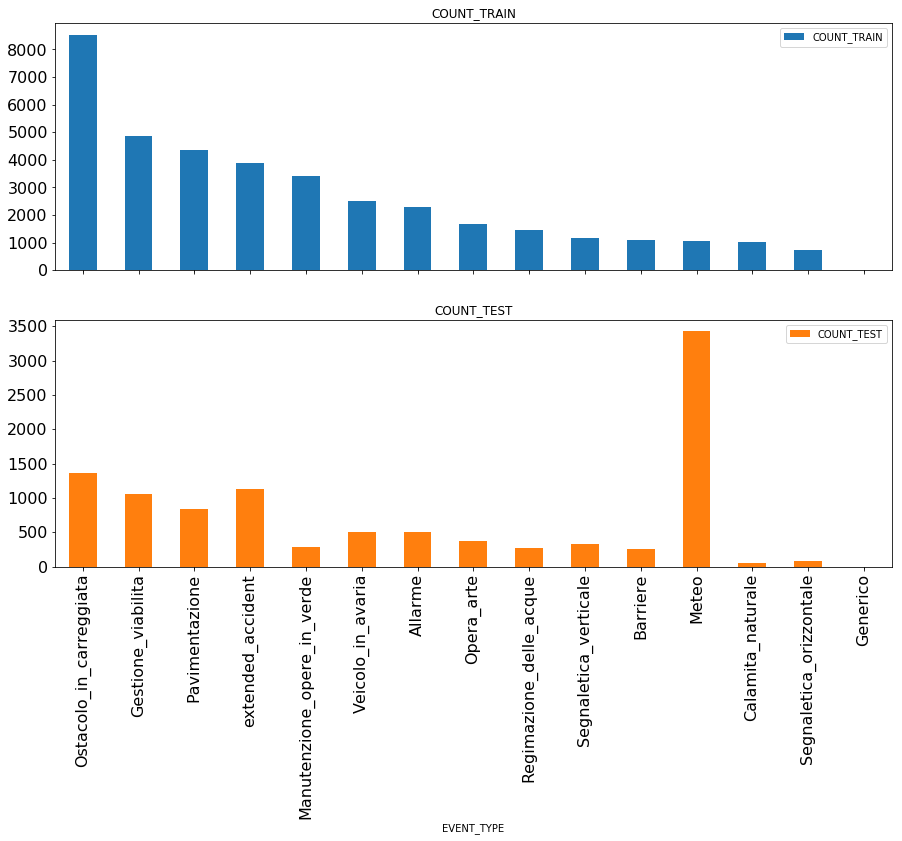

In [174]:
tr_e_c=events_train_df[['EVENT_TYPE', 'KEY']].groupby('EVENT_TYPE', as_index=False).count().rename(columns={'KEY':'COUNT_TRAIN'})
te_e_c=events_test_df[['EVENT_TYPE', 'KEY']].groupby('EVENT_TYPE', as_index=False).count().rename(columns={'KEY':'COUNT_TEST'})
pd.merge(tr_e_c,te_e_c).sort_values(['COUNT_TRAIN','COUNT_TEST'], ascending=False).plot(kind='bar', figsize=(15,10), x='EVENT_TYPE', fontsize=16, subplots=True)

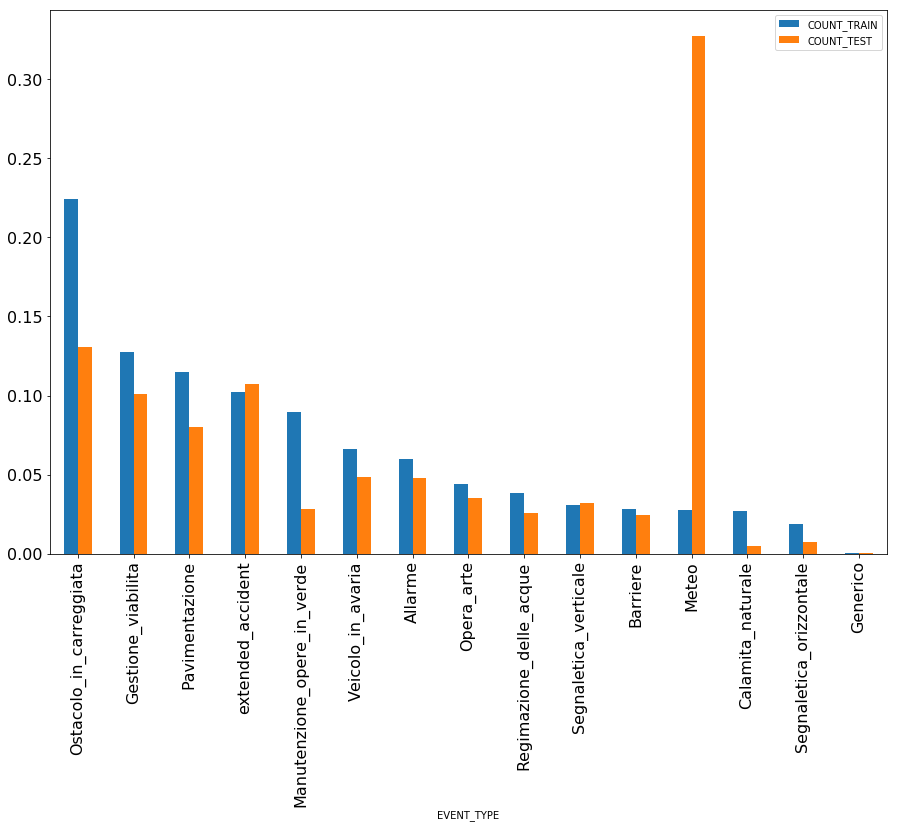

In [191]:
tr_e_c_n=(events_train_df[['EVENT_TYPE', 'KEY']].groupby('EVENT_TYPE', as_index=True).count().rename(columns={'KEY':'COUNT_TRAIN'})/len(events_train_df)).reset_index()
te_e_c_n=(events_test_df[['EVENT_TYPE', 'KEY']].groupby('EVENT_TYPE', as_index=True).count().rename(columns={'KEY':'COUNT_TEST'})/len(events_test_df)).reset_index()
pd.merge(tr_e_c_n,te_e_c_n).sort_values(['COUNT_TRAIN','COUNT_TEST'], ascending=False).plot(kind='bar', figsize=(15,10), x='EVENT_TYPE', fontsize=16, stacked=False)

In [88]:
events_train_df.groupby('EVENT_TYPE')['KEY'].transform('count')

0        4857
1        4359
2        3408
3        1674
4        1674
5        8528
6        8528
7        8528
8        4857
9        8528
10       3408
11       1674
12       8528
13       8528
14       3895
15       3895
16       3895
17       4359
18       4359
19       8528
20       8528
21       3408
22       8528
23       2504
24       8528
25       4359
26       4857
27       8528
28       8528
29       4359
         ... 
37978    4359
37979    4857
37980    4359
37981    4359
37982    3408
37983    4359
37984    4857
37985    4857
37986    3895
37987    4857
37988    3408
37989    4857
37990    4857
37991    4857
37992    4857
37993    4857
37994    4857
37995    4857
37996    4857
37997    3408
37998    4857
37999    4857
38000    4857
38001    3408
38002    4359
38003    3408
38004    4857
38005    4857
38006    1674
38007    8528
Name: KEY, Length: 38008, dtype: int64

In [136]:
events_train_df.groupby('KEY')['EVENT_TYPE'].value_counts()

KEY    EVENT_TYPE                 
0.0    Veicolo_in_avaria              117
       Ostacolo_in_carreggiata         97
       Manutenzione_opere_in_verde     84
       Allarme                         41
       Pavimentazione                  37
       extended_accident               35
       Segnaletica_orizzontale         25
       Opera_arte                      18
       Gestione_viabilita              17
       Meteo                           14
       Calamita_naturale                8
       Regimazione_delle_acque          6
       Barriere                         5
       Segnaletica_verticale            5
1.0    Manutenzione_opere_in_verde    115
       Veicolo_in_avaria               90
       Ostacolo_in_carreggiata         79
       extended_accident               38
       Pavimentazione                  33
       Allarme                         31
       Gestione_viabilita              30
       Opera_arte                      23
       Segnaletica_orizzontale         20